In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import tensorflow as tf

# For loading the MNIST dataset from Keras
from tensorflow.keras.datasets import mnist

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(f'Training data shape: {X_train.shape}')
print(f'Test data shape: {X_test.shape}')

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)


In [4]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
print(f'Training data shape: {train.shape}')
print(f'Test data shape: {test.shape}')

Training data shape: (42000, 785)
Test data shape: (28000, 784)


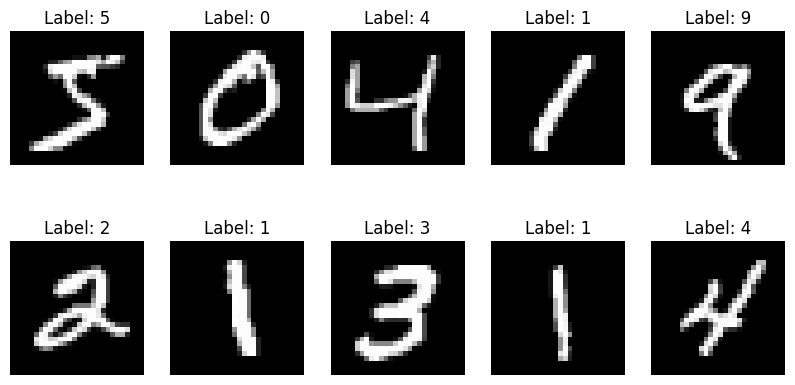

In [5]:
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.show()

In [6]:
X_train_flat = X_train.reshape(X_train.shape[0], -1) / 255.0
X_test_flat = X_test.reshape(X_test.shape[0], -1) / 255.0

print(f'Flattened training data shape: {X_train_flat.shape}')
print(f'Flattened test data shape: {X_test_flat.shape}')

Flattened training data shape: (60000, 784)
Flattened test data shape: (10000, 784)


In [7]:
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train_flat, y_train, test_size=0.2, random_state=42)

print(f'Training set shape: {X_train_split.shape}')
print(f'Validation set shape: {X_val.shape}')

Training set shape: (48000, 784)
Validation set shape: (12000, 784)


KNN Validation Accuracy: 0.9727
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1175
           1       0.96      1.00      0.98      1322
           2       0.98      0.97      0.97      1174
           3       0.97      0.97      0.97      1219
           4       0.97      0.97      0.97      1176
           5       0.97      0.97      0.97      1104
           6       0.99      0.99      0.99      1177
           7       0.97      0.98      0.97      1299
           8       0.99      0.94      0.96      1160
           9       0.96      0.96      0.96      1194

    accuracy                           0.97     12000
   macro avg       0.97      0.97      0.97     12000
weighted avg       0.97      0.97      0.97     12000



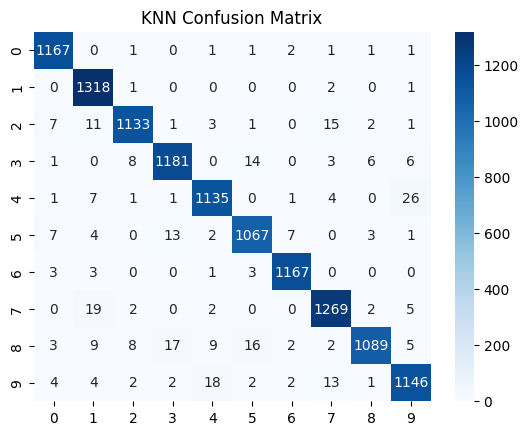

In [8]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train_split, y_train_split)

y_val_pred_knn = knn_model.predict(X_val)

knn_acc = accuracy_score(y_val, y_val_pred_knn)
print(f'KNN Validation Accuracy: {knn_acc:.4f}')

print(classification_report(y_val, y_val_pred_knn))
sns.heatmap(confusion_matrix(y_val, y_val_pred_knn), annot=True, fmt='d', cmap='Blues')
plt.title("KNN Confusion Matrix")
plt.show()

KNN Validation Accuracy: 0.9664
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1175
           1       0.94      1.00      0.97      1322
           2       0.98      0.95      0.97      1174
           3       0.96      0.96      0.96      1219
           4       0.97      0.96      0.97      1176
           5       0.96      0.97      0.96      1104
           6       0.98      0.99      0.99      1177
           7       0.96      0.97      0.96      1299
           8       0.99      0.91      0.95      1160
           9       0.95      0.95      0.95      1194

    accuracy                           0.97     12000
   macro avg       0.97      0.97      0.97     12000
weighted avg       0.97      0.97      0.97     12000



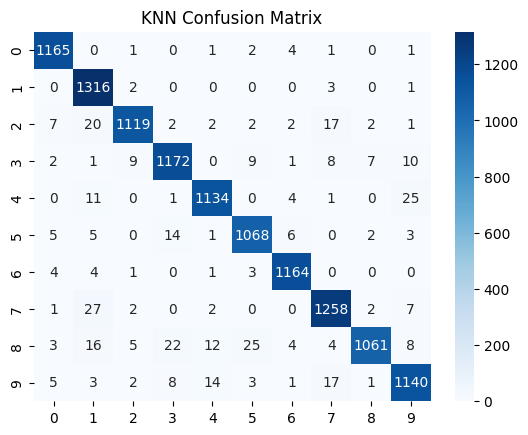

In [9]:
knn_model = KNeighborsClassifier(n_neighbors=10)
knn_model.fit(X_train_split, y_train_split)

y_val_pred_knn = knn_model.predict(X_val)

knn_acc = accuracy_score(y_val, y_val_pred_knn)
print(f'KNN Validation Accuracy: {knn_acc:.4f}')

print(classification_report(y_val, y_val_pred_knn))
sns.heatmap(confusion_matrix(y_val, y_val_pred_knn), annot=True, fmt='d', cmap='Blues')
plt.title("KNN Confusion Matrix")
plt.show()

KNN Validation Accuracy: 0.9573
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1175
           1       0.91      0.99      0.95      1322
           2       0.98      0.93      0.95      1174
           3       0.96      0.95      0.95      1219
           4       0.97      0.95      0.96      1176
           5       0.95      0.96      0.95      1104
           6       0.98      0.98      0.98      1177
           7       0.95      0.96      0.95      1299
           8       0.98      0.90      0.94      1160
           9       0.94      0.95      0.94      1194

    accuracy                           0.96     12000
   macro avg       0.96      0.96      0.96     12000
weighted avg       0.96      0.96      0.96     12000



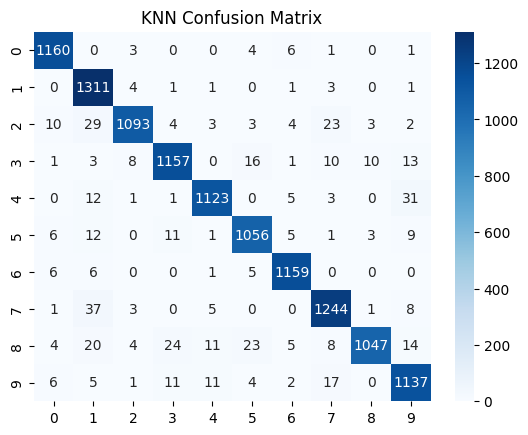

In [10]:
knn_model = KNeighborsClassifier(n_neighbors=25)
knn_model.fit(X_train_split, y_train_split)

y_val_pred_knn = knn_model.predict(X_val)

knn_acc = accuracy_score(y_val, y_val_pred_knn)
print(f'KNN Validation Accuracy: {knn_acc:.4f}')

print(classification_report(y_val, y_val_pred_knn))
sns.heatmap(confusion_matrix(y_val, y_val_pred_knn), annot=True, fmt='d', cmap='Blues')
plt.title("KNN Confusion Matrix")
plt.show()

In [11]:
# In KNN as neighbours increases there is slight decrease in accuracy metric

SVM Validation Accuracy: 0.9352
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1175
           1       0.96      0.98      0.97      1322
           2       0.91      0.93      0.92      1174
           3       0.91      0.91      0.91      1219
           4       0.93      0.96      0.94      1176
           5       0.90      0.90      0.90      1104
           6       0.97      0.96      0.97      1177
           7       0.95      0.94      0.95      1299
           8       0.94      0.89      0.91      1160
           9       0.94      0.90      0.92      1194

    accuracy                           0.94     12000
   macro avg       0.93      0.93      0.93     12000
weighted avg       0.94      0.94      0.94     12000



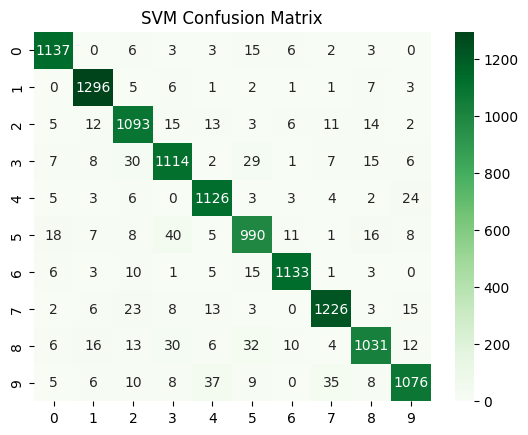

In [12]:
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_split, y_train_split)

y_val_pred_svm = svm_model.predict(X_val)

svm_acc = accuracy_score(y_val, y_val_pred_svm)
print(f'SVM Validation Accuracy: {svm_acc:.4f}')

print(classification_report(y_val, y_val_pred_svm))
sns.heatmap(confusion_matrix(y_val, y_val_pred_svm), annot=True, fmt='d', cmap='Greens')
plt.title("SVM Confusion Matrix")
plt.show()

Decision Tree Validation Accuracy: 0.8679
              precision    recall  f1-score   support

           0       0.92      0.91      0.92      1175
           1       0.93      0.96      0.95      1322
           2       0.86      0.85      0.85      1174
           3       0.85      0.84      0.84      1219
           4       0.86      0.87      0.86      1176
           5       0.82      0.81      0.82      1104
           6       0.90      0.89      0.90      1177
           7       0.90      0.91      0.91      1299
           8       0.80      0.79      0.79      1160
           9       0.82      0.83      0.83      1194

    accuracy                           0.87     12000
   macro avg       0.87      0.87      0.87     12000
weighted avg       0.87      0.87      0.87     12000



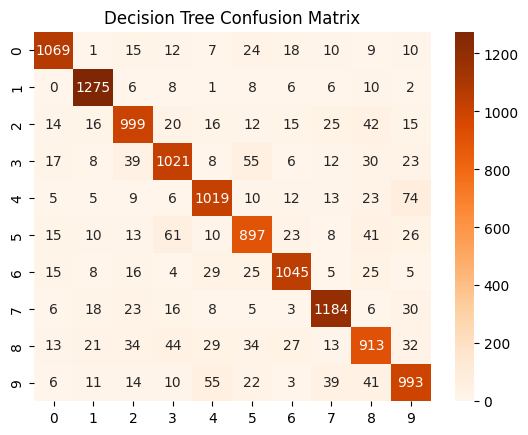

In [13]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_split, y_train_split)
y_val_pred_dt = dt_model.predict(X_val)
dt_acc = accuracy_score(y_val, y_val_pred_dt)
print(f'Decision Tree Validation Accuracy: {dt_acc:.4f}')
print(classification_report(y_val, y_val_pred_dt))
sns.heatmap(confusion_matrix(y_val, y_val_pred_dt), annot=True, fmt='d', cmap='Oranges')
plt.title("Decision Tree Confusion Matrix")
plt.show()

In [14]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_split, y_train_split)
y_val_pred_rf = rf_model.predict(X_val)
rf_acc = accuracy_score(y_val, y_val_pred_rf)
print(f'Random Forest Validation Accuracy: {rf_acc:.4f}')

Random Forest Validation Accuracy: 0.9693


In [15]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier(objective='multi:softmax', num_class=10, random_state=42)
xgb_model.fit(X_train_split, y_train_split)
y_val_pred_xgb = xgb_model.predict(X_val)
xgb_acc = accuracy_score(y_val, y_val_pred_xgb)
print(f'XGBoost Validation Accuracy: {xgb_acc:.4f}')

XGBoost Validation Accuracy: 0.9770


In [16]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical

train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

x_train = train_data.iloc[:, 1:].values / 255.0  # Normalize pixel values, skipping the label column
y_train = train_data.iloc[:, 0].values  # Labels are the first column

x_test = test_data.values / 255.0  # Normalize pixel values

x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# One-hot encode the labels for training
y_train = to_categorical(y_train, 10)

cnn_model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

cnn_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

cnn_model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

train_loss, train_acc = cnn_model.evaluate(x_train, y_train, verbose=2)
print(f"CNN Training accuracy: {train_acc:.4f}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 32s 57ms/step - accuracy: 0.8394 - loss: 0.5288 - val_accuracy: 0.9788 - val_loss: 0.0723
Epoch 2/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 41s 56ms/step - accuracy: 0.9801 - loss: 0.0648 - val_accuracy: 0.9860 - val_loss: 0.0484
Epoch 3/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 29s 55ms/step - accuracy: 0.9884 - loss: 0.0397 - val_accuracy: 0.9863 - val_loss: 0.0475
Epoch 4/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 29s 55ms/step - accuracy: 0.9913 - loss: 0.0278 - val_accuracy: 0.9892 - val_loss: 0.0393
Epoch 5/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 40s 54ms/step - accuracy: 0.9946 - loss: 0.0183 - val_accuracy: 0.9871 - val_loss: 0.0426
Epoch 6/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 41s 55ms/step - accuracy: 0.9944 - loss: 0.0178 - val_accuracy: 0.9879 - val_loss: 0.0400
Epoch 7/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 40s 53ms/step - accuracy: 0.9953 - loss: 0.0135 - val_accuracy: 0.9895 - val_loss: 0.0418
Epoch 8/10
525/525 ━━━━━━━━━━━━━━━━━━━━ 28s 54ms/step - accuracy: 0.9972 - loss: 0.0100 - 

In [17]:
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

x_train_flat = x_train.reshape(x_train.shape[0], -1)
x_test_flat = x_test.reshape(x_test.shape[0], -1)

# Apply PCA to reduce the dimensions
pca = PCA(n_components=50)
x_train_pca = pca.fit_transform(x_train_flat)
x_test_pca = pca.transform(x_test_flat)

x_train_split, x_val_split, y_train_split, y_val_split = train_test_split(x_train_pca, y_train, test_size=0.2, random_state=42)

classifiers = {
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

# Train and evaluate each model
model_accuracies = {}

for name, clf in classifiers.items():
    y_train_split_1d = np.argmax(y_train_split, axis=1)
    y_val_split_1d = np.argmax(y_val_split, axis=1)
    clf.fit(x_train_split, y_train_split_1d)
    y_pred = clf.predict(x_val_split)
    accuracy = accuracy_score(y_val_split_1d, y_pred)
    model_accuracies[name] = accuracy

# Accuracy of each model
for name, accuracy in model_accuracies.items():
    print(f"{name} Model Accuracy: {accuracy:.4f}")
print(f"\nCNN Accuracy: {train_acc:.4f}\n")

best_model = "CNN" if train_acc > max(model_accuracies.values()) else max(model_accuracies, key=model_accuracies.get)
print(f"The best model is: {best_model}")

KNN Model Accuracy: 0.9726
SVM Model Accuracy: 0.9777
Decision Tree Model Accuracy: 0.8265
Random Forest Model Accuracy: 0.9465

CNN Accuracy: 0.9951

The best model is: CNN


In [18]:
import numpy as np
import pandas as pd
from google.colab import files

y_pred_cnn = cnn_model.predict(x_test)

# Convert the predicted probabilities to class labels
y_pred_labels = np.argmax(y_pred_cnn, axis=1)

output_df = pd.DataFrame({
    'ImageId': np.arange(1, len(y_pred_labels) + 1),
    'Label': y_pred_labels
})

output_file = 'mnist_predictions_cnn.csv'
output_df.to_csv(output_file, index=False)

files.download(output_file)

875/875 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>